In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G_caltech = nx.read_gml('data/Caltech36.gml')
G_mit = nx.read_gml('data/MIT8.gml')
G_johns = nx.read_gml('data/Johns Hopkins55.gml')

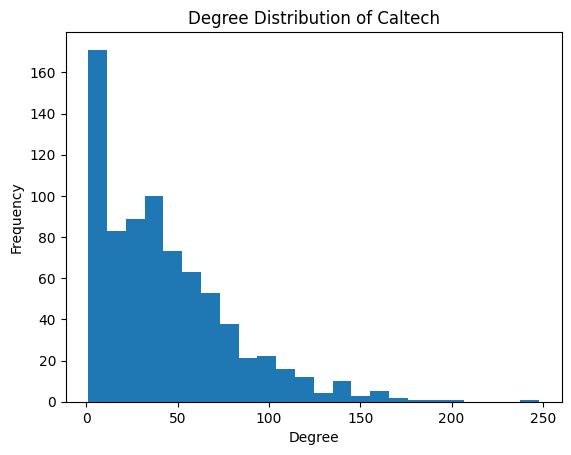

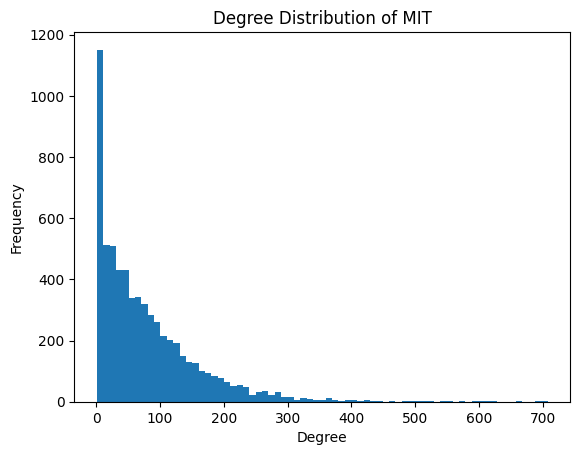

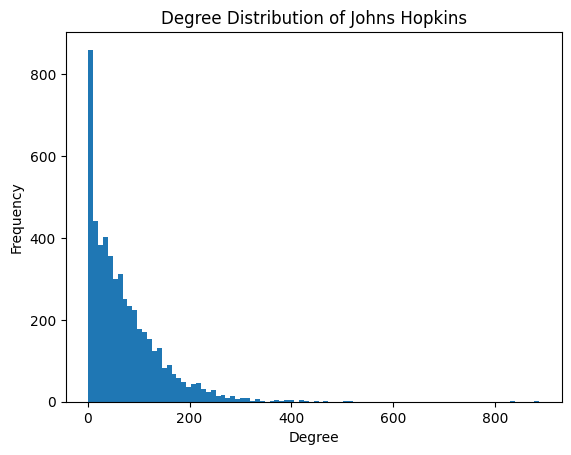

In [2]:
def plot_degree_distribution(g, title):
    degrees = [g.degree(n) for n in g.nodes()]
    plt.hist(degrees, bins='auto')
    plt.title(f"Degree Distribution of {title}")
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()

plot_degree_distribution(G_caltech, 'Caltech')
plot_degree_distribution(G_mit, 'MIT')
plot_degree_distribution(G_johns, 'Johns Hopkins')

## Analyse

- Grosse proportion à très faibles degrés : typique des graphes en échelle libre. 
- Il y a tout de même des nœuds à degré très élevés : ce sont des points de concentration forte qui permettent de connecter un grand nombre de personnes.
- Le graphe est clairement épars.
- On peut presque soupçonner une loi de puissance. 

In [3]:
def compute_network_metrics(g, name):
    global_clust_coeff = nx.average_clustering(g)
    mean_local_clust_coeff = nx.transitivity(g)
    edge_density = nx.density(g)

    print(f"{name} Network Metrics:")
    print(f"Global Clustering Coefficient: {global_clust_coeff}")
    print(f"Mean Local Clustering Coefficient: {mean_local_clust_coeff}")
    print(f"Edge Density: {edge_density}\n")

compute_network_metrics(G_caltech, 'Caltech')
compute_network_metrics(G_mit, 'MIT')
compute_network_metrics(G_johns, 'Johns Hopkins')

Caltech Network Metrics:
Global Clustering Coefficient: 0.40929439048517247
Mean Local Clustering Coefficient: 0.2912826901150874
Edge Density: 0.05640442132639792
MIT Network Metrics:
Global Clustering Coefficient: 0.2712187419501315
Mean Local Clustering Coefficient: 0.18028845093502427
Edge Density: 0.012118119495041378
Johns Hopkins Network Metrics:
Global Clustering Coefficient: 0.26839307371293525
Mean Local Clustering Coefficient: 0.19316123901594015
Edge Density: 0.013910200162372396


## Analyse 

- Les graphes sont tous les trois très épars comme dit au-dessus. 
- Le graphe de Caltech a un coefficient de groupe bien plus élevé que ceux du MIT et de Johns Hopkins. Cela peut signifier qu'il y a plus de petits groupes au sein de l'université (un ami d'un ami est un ami), alors que les deux autres universités, bien que possédant des nœuds à grandes concentrations, sont majoritairement constitués d'individus dispersés. 

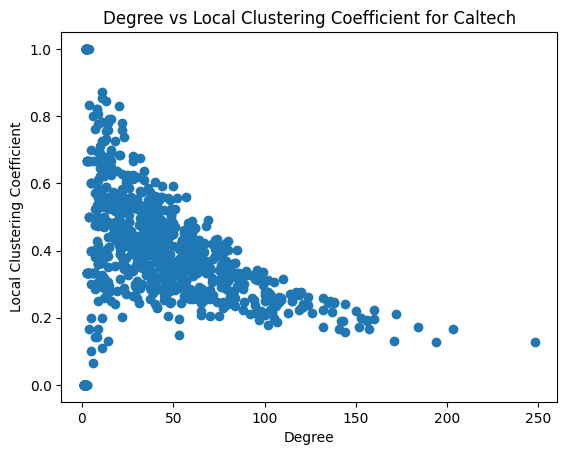

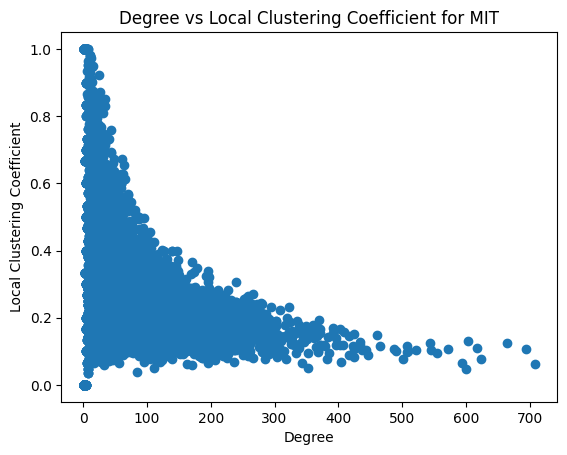

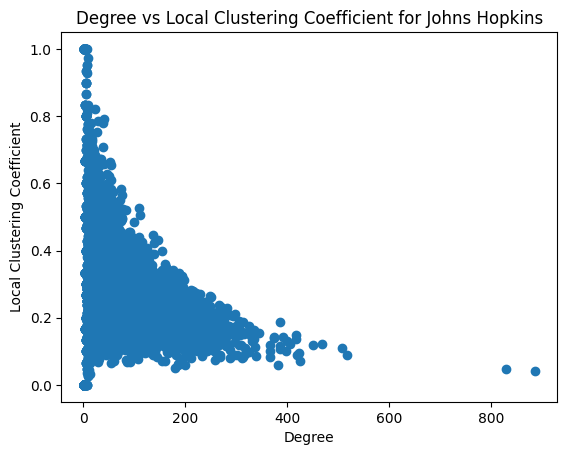

In [4]:
def plot_degree_vs_clustering(g, title):
    degrees = [g.degree(n) for n in g.nodes()]
    local_clust_coeffs = [nx.clustering(g, n) for n in g.nodes()]

    plt.scatter(degrees, local_clust_coeffs)
    plt.title(f"Degree vs Local Clustering Coefficient for {title}")
    plt.xlabel('Degree')
    plt.ylabel('Local Clustering Coefficient')
    plt.show()

# Plot for each network
plot_degree_vs_clustering(G_caltech, 'Caltech')
plot_degree_vs_clustering(G_mit, 'MIT')
plot_degree_vs_clustering(G_johns, 'Johns Hopkins')

## Analyse

- On retrouve le phénomène de : un ami d'un ami est un ami, car les nœuds à faible degré ont tendance à avoir un grand coefficient de groupe. 
- L'université de Johns Hopkins n'a pas de continuité dans les degrés de $\sim 500$ à $\sim 800$, cela peut être la marque d'une hiérarchie différente. 

# Question 3

In [5]:
node_attributes = set()
first_node = next(iter(G_caltech.nodes(data=True)))
node_attributes.update(first_node[1].keys())

print("Attributes in the Caltech network:", node_attributes)

Attributes in the Caltech network: {'second_major', 'gender', 'high_school', 'dorm', 'student_fac', 'year', 'major_index'}


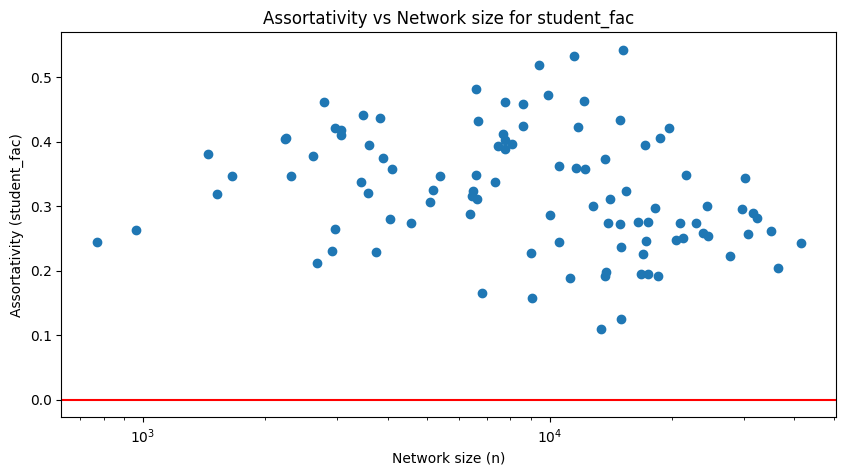

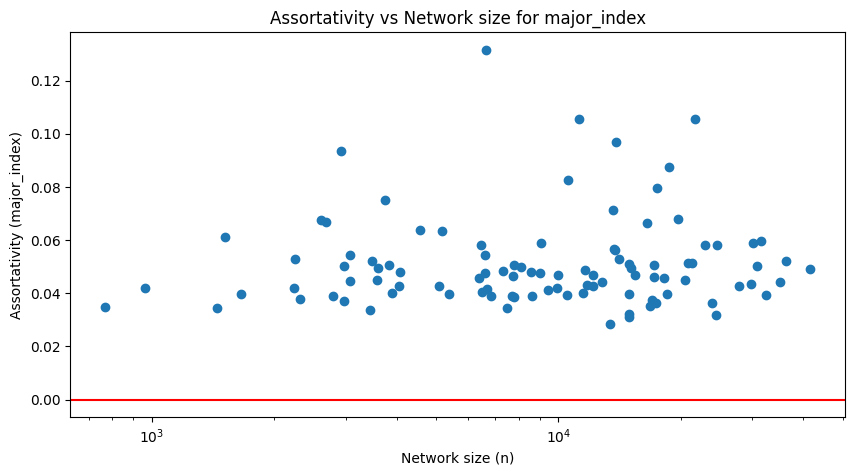

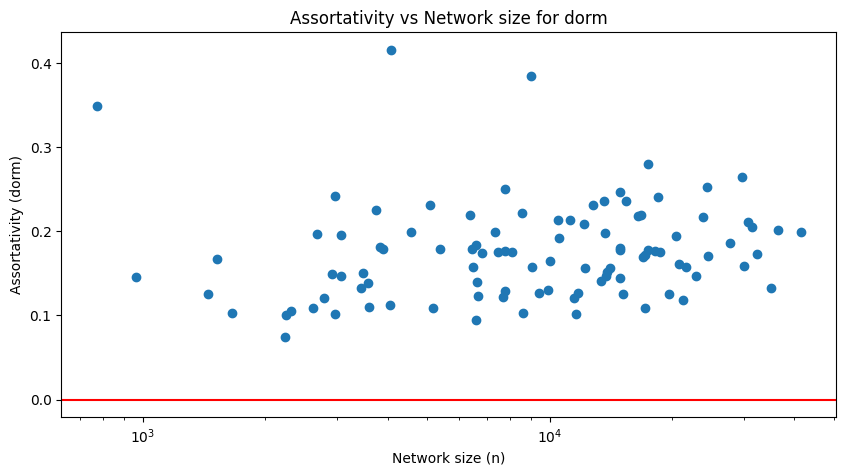

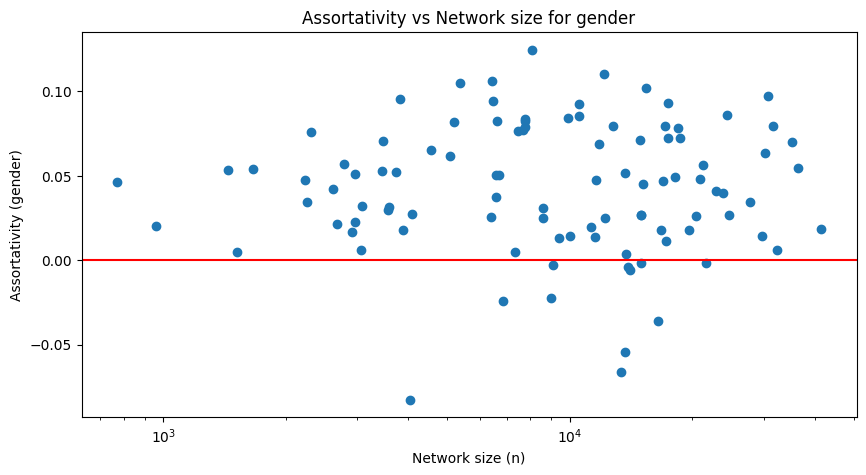

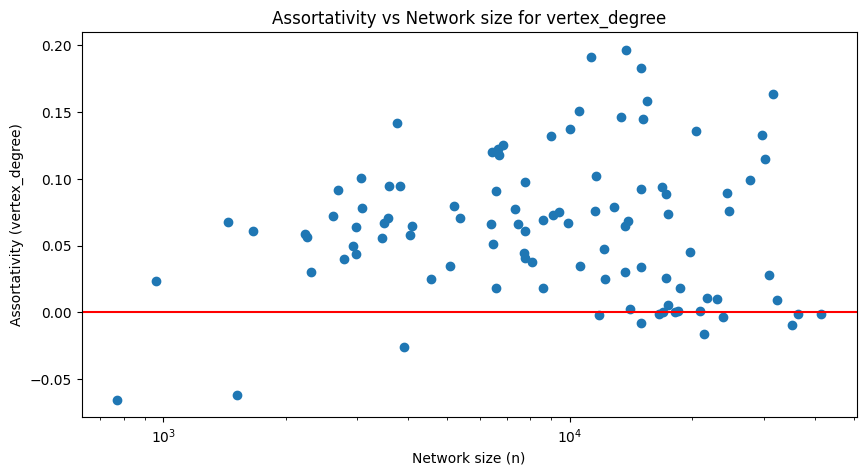

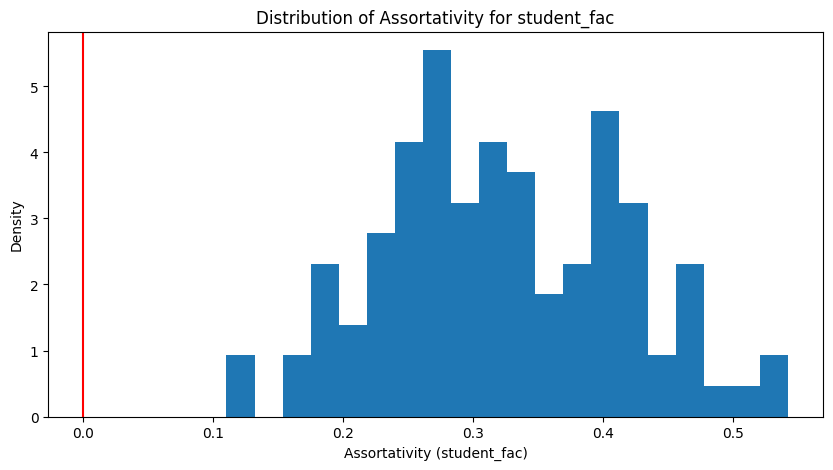

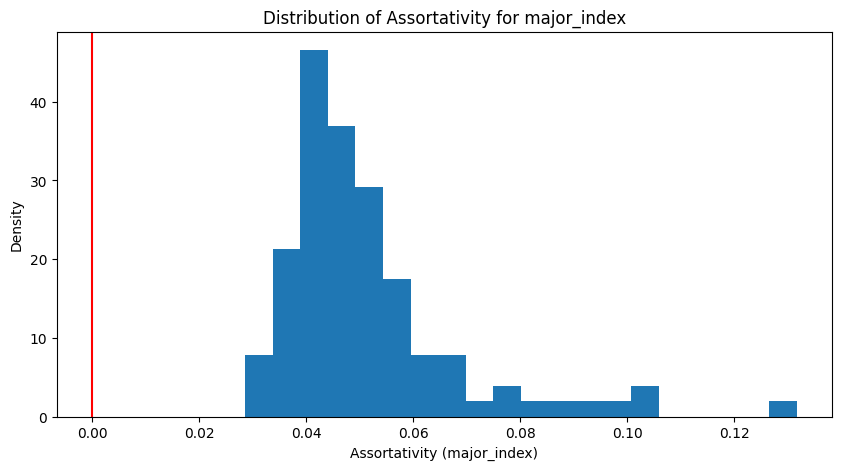

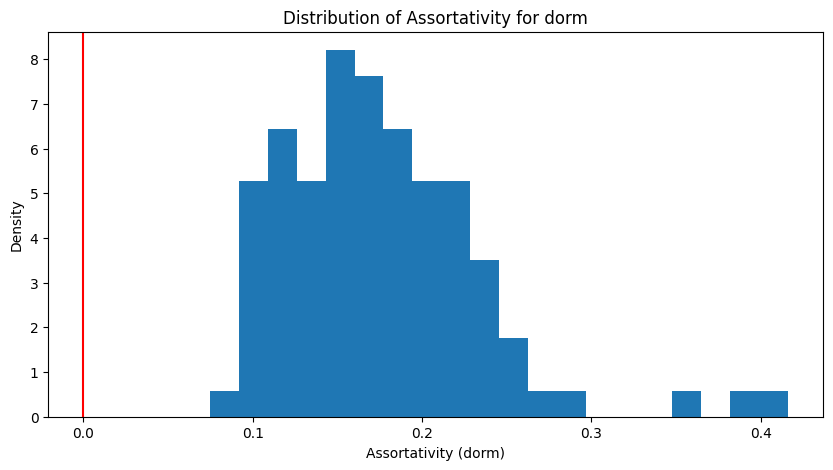

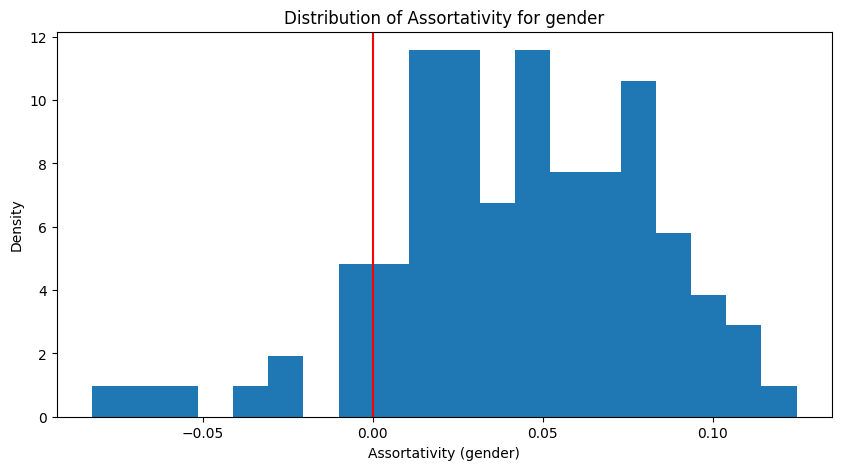

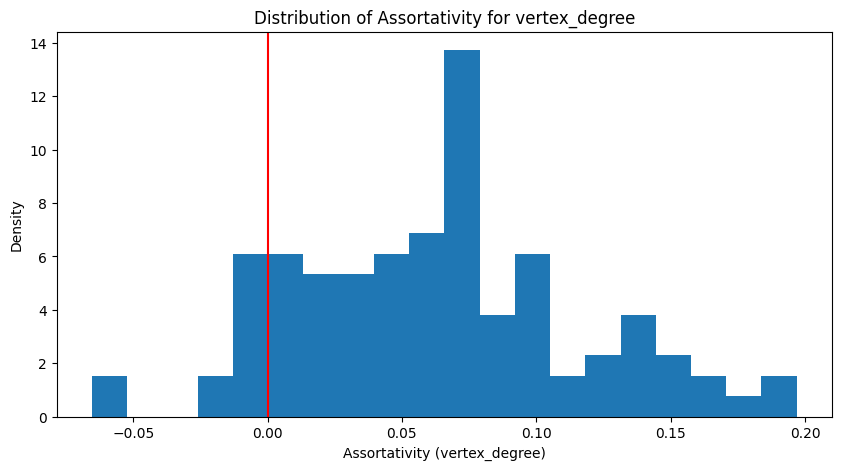

In [6]:
import os 


data_dir = "data/"
file_list = os.listdir(data_dir)
networks = []
for f in file_list:
    networks.append(nx.read_gml(data_dir + f))
    

assortativities = {
    'student_fac': [],
    'major_index': [],
    'dorm': [],
    'gender': [], 
    'vertex_degree': []
}

sizes = []

for G in networks:
    size = G.number_of_nodes()
    sizes.append(size)
    
    for attribute in assortativities.keys():
        if attribute == 'vertex_degree':
            assortativity = nx.degree_assortativity_coefficient(G)
        else:
            assortativity = nx.attribute_assortativity_coefficient(G, attribute)
        
        assortativities[attribute].append(assortativity)

for attribute, values in assortativities.items():
    plt.figure(figsize=(10, 5))
    plt.scatter(sizes, values)
    plt.xscale('log')
    plt.xlabel('Network size (n)')
    plt.ylabel(f'Assortativity ({attribute})')
    plt.axhline(y=0, color='r', linestyle='-') 
    plt.title(f'Assortativity vs Network size for {attribute}')
    plt.show()

for attribute, values in assortativities.items():
    plt.figure(figsize=(10, 5))
    plt.hist(values, bins=20, density=True)
    plt.axvline(x=0, color='r', linestyle='-')
    plt.xlabel(f'Assortativity ({attribute})')
    plt.ylabel('Density')
    plt.title(f'Distribution of Assortativity for {attribute}')
    plt.show()